In [ ]:
import mysql.connector as sql
import pandas as pd

db_connection=sql.connect(host='localhost',database='ai',user='root',password='root')

query="SELECT * from train"
df_mysql=pd.read_sql(query, con = db_connection)
df_mysql

: 

#display top 5 rows

In [4]:
df_mysql.head(5)



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S


# CHECK LAST 3 ROWS OF THE DATASET

In [5]:
df_mysql.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
711,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.00,B42,S
712,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.00,C148,C
713,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.75,,Q


# FIND SHAPE OF OUR DATASET(NUMBER OF ROWS & NUMBER OF COLUMNS)

In [7]:
rows=len(df_mysql.index)
cols=len(df_mysql.columns)
rows,cols

(714, 12)

# GET INFORMATION ABOUT OUR DATASET LIKE TOTAL NUMBER ROWS,TOTAL NUMBER OF COLUMNS,DATATYPE OF EACH COLUMN AND MEMORY REQUIREDMENT

In [8]:
df_mysql.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    int64  
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Cabin        714 non-null    object 
 11  Embarked     714 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 67.1+ KB


# GET OVERALL STATISTICS ABOUT THE DATAFRAME

In [2]:
statistics_all = df_mysql.describe(include='all')
print(statistics_all)

        PassengerId    Survived      Pclass                     Name   Sex  \
count    714.000000  714.000000  714.000000                      714   714   
unique          NaN         NaN         NaN                      714     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   453   
mean     448.582633    0.406162    2.236695                      NaN   NaN   
std      259.119524    0.491460    0.838250                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      222.250000    0.000000    1.000000                      NaN   NaN   
50%      445.000000    0.000000    2.000000                      NaN   NaN   
75%      677.750000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare 

# DATA FILTERING

In [3]:
df_mysql.filter(items=['Age', 'Fare'])

,Age,Fare
0,22,7.2500
1,38,71.2833
2,26,7.9250
3,35,53.1000
4,35,8.0500
...,...,...
709,39,29.1250
710,27,13.0000
711,19,30.0000
712,26,30.0000


# CHECK NULL VALUES IN THE DATASET

In [4]:
df_mysql.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# DROP THE COLUMN

In [5]:
df_mysql.drop(["Name"], axis=1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22,1,0,A/5 21171,7.2500,,S
1,2,1,1,female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26,0,0,STON/O2. 3101282,7.9250,,S
3,4,1,1,female,35,1,0,113803,53.1000,C123,S
4,5,0,3,male,35,0,0,373450,8.0500,,S
...,...,...,...,...,...,...,...,...,...,...,...
709,886,0,3,female,39,0,5,382652,29.1250,,Q
710,887,0,2,male,27,0,0,211536,13.0000,,S
711,888,1,1,female,19,0,0,112053,30.0000,B42,S
712,890,1,1,male,26,0,0,111369,30.0000,C148,C


# HANDLE MISSING VALUES

In [6]:
df_mysql.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
...,...,...,...,...,...,...,...,...,...,...,...,...
709,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39,0,5,382652,29.1250,,Q
710,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,,S
711,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S
712,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C


# CATEGORICAL DATA ENCODING

In [ ]:
# encoding textual data into number for easier processing in algorithms

# WHAT IS UNIVARIATE ANALYSIS

In [ ]:
#Each variable in the dataset is explored separably

# HOW MANY PEOPLE SURVIVED AND HOW MANY DIED PLOT ON GRAPH

<Axes: xlabel='Survived'>

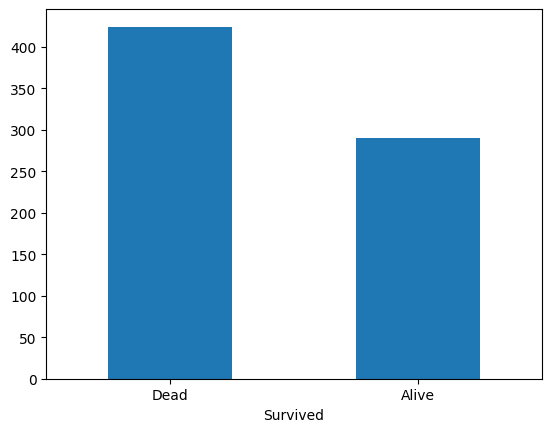

In [7]:
_df = df_mysql.replace({"Survived":{0:"Dead",1:"Alive"}})
df_mysql['Survived'].replace({0:"Dead",1:"Alive"}).value_counts().plot(kind='bar',rot=0)

# HOW MANY PASSENGERS WERE IN FIRST CLASS,SECOND CLASS AND THIRD CLASS PLOT THOSE FIGURES ON GRAPH

<Axes: xlabel='Class'>

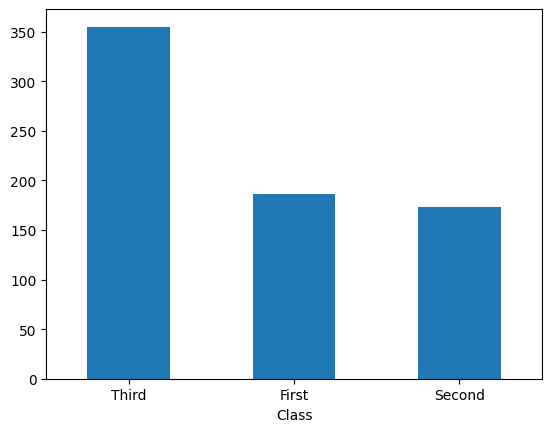

In [8]:
df_mysql["Pclass"].replace({1:"First",2:"Second",3:"Third"}).value_counts().plot(kind='bar',rot=0,xlabel="Class")

# NUMBER  OF MALE AND FEMALE PASSANGERS

<Axes: xlabel='Sex'>

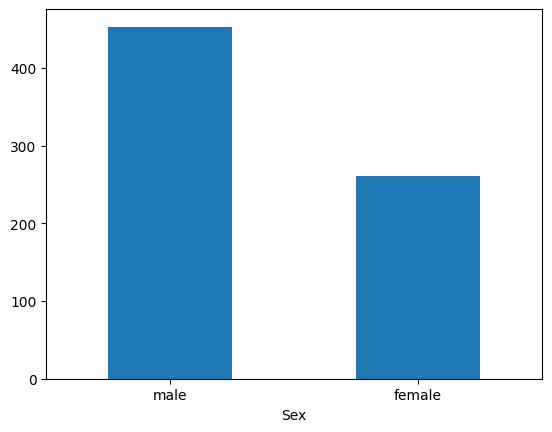

In [9]:
df_mysql["Sex"].value_counts().plot(kind='bar',rot=0)

# BIVARIANT ANALSIS

In [10]:
#Two variables are observed

# HOW HAS BETTER CANCE OF SURVIVAL MALE OR FEMALE

<Axes: xlabel='Survived'>

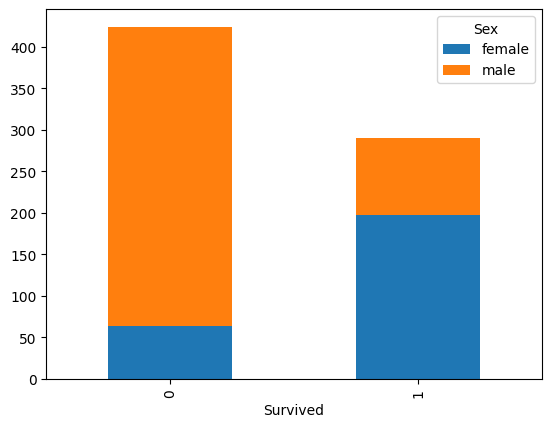

In [11]:
df_mysql.groupby(["Survived","Sex"]).size().unstack().plot(kind='bar',stacked=True)

# WHICH PASSENGER CLASS HAS BETTER CHANCE OF SURVIVAL(FIRST,SECOND,OR THIRD CLASS)?

<Axes: xlabel='Survived'>

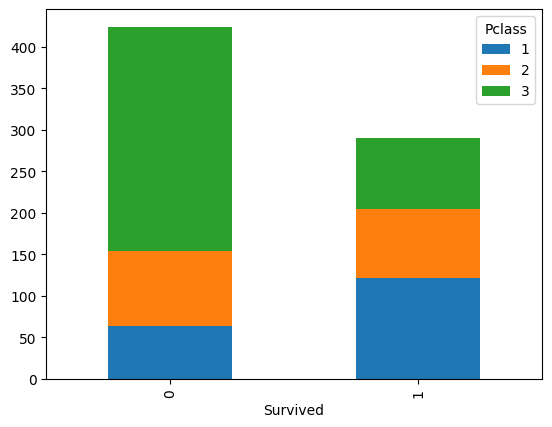

In [13]:
df_mysql.groupby(["Survived","Pclass"]).size().unstack().plot(kind='bar',stacked=True)

# FEATURE ENGINEERING

In [14]:
#leverages data to create new variables that aren't in the training set